In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('D:/oil_23.csv',parse_dates=True,index_col=['Years'])

In [6]:
df.head()

,Unnamed: 0,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Crude_oil_production
Years,,,,,,,,,,,,,,,,,,,,,
1992-01-01,0,7171.000000,8332.000000,7632.000000,1605.000000,425.000000,3429.000000,2845.000000,2266.000000,626.000000,...,526.000000,1202.000000,2371.000000,1986.000000,1433.000000,746.000000,439.000000,1579.000000,895.000000,54177.00000
1993-01-01,1,6847.000000,8198.000000,6730.000000,1679.000000,512.000000,3540.000000,2890.000000,2159.000000,643.000000,...,509.000000,1167.000000,2450.000000,2084.000000,1361.000000,781.000000,461.000000,1589.000000,908.000000,54096.00000
1994-01-01,2,6661.627397,8119.873973,6135.084932,1746.194521,552.534247,3618.054795,2939.287671,2193.241096,671.424657,...,536.397260,1155.000000,2588.010959,2592.671233,1377.589041,816.246575,454.934247,1590.219178,913.805480,54799.96712
1995-01-01,3,6559.589041,8231.232877,5995.221918,1805.271233,560.000000,3643.219178,2990.049315,2232.649315,695.424657,...,646.232877,1161.794521,2750.136986,2755.764384,1390.000000,861.287671,589.798630,1578.684932,939.000000,55768.56028
1996-01-01,4,6464.557377,8218.117486,5849.874317,1836.674863,578.543716,3685.710383,3131.338798,2277.650273,795.002732,...,708.784153,1227.144809,2937.961749,2827.038251,1400.846995,893.387978,632.964481,1627.486339,942.666667,57100.21038


In [8]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Crude_oil_production'],
      dtype='object')

In [9]:
df.drop(columns={'Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'},inplace=True)

In [18]:
ts = df.Crude_oil_production.resample('A').sum()

In [19]:
ts

Years
1992-12-31    54177.00000
1993-12-31    54096.00000
1994-12-31    54799.96712
1995-12-31    55768.56028
1996-12-31    57100.21038
1997-12-31    58789.44521
1998-12-31    59883.63836
1999-12-31    58741.62466
2000-12-31    60886.07310
2001-12-31    60583.21048
2002-12-31    59636.98099
2003-12-31    61772.76766
2004-12-31    64327.61919
2005-12-31    65529.73133
2006-12-31    65143.11710
2007-12-31    64855.93157
2008-12-31    65908.77204
2009-12-31    64745.25549
2010-12-31    66476.93936
2011-12-31    66841.59575
2012-12-31    68980.68429
2013-12-31    69216.81855
2014-12-31    71099.35354
2015-12-31    73513.12443
2016-12-31    73985.22287
2017-12-31    74455.55364
2018-12-31    76231.36896
Freq: A-DEC, Name: Crude_oil_production, dtype: float64

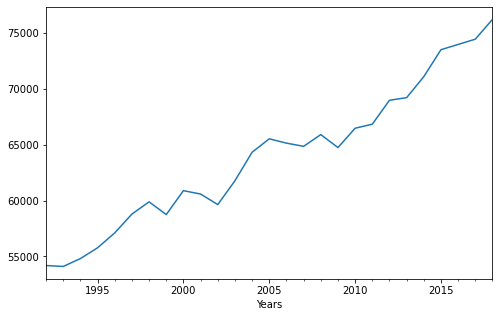

In [21]:
#Checking for stationarity
plt.figure(figsize=(8,5))
ts.plot()
plt.show()

<Figure size 1440x288 with 0 Axes>

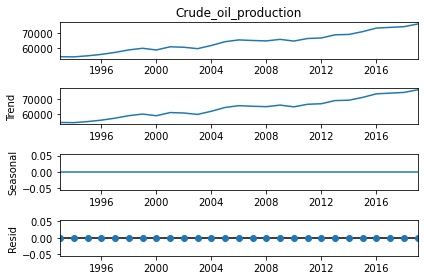

In [22]:
import statsmodels.api as sm
plt.figure(figsize=(20,4))
decomposition = sm.tsa.seasonal_decompose(ts,model='additive')
decomposition.plot()
plt.show()

In [25]:
#Differencing the timeseries
df_diff = ts.diff(periods=1).dropna()
df_diff

Years
1993-12-31     -81.00000
1994-12-31     703.96712
1995-12-31     968.59316
1996-12-31    1331.65010
1997-12-31    1689.23483
1998-12-31    1094.19315
1999-12-31   -1142.01370
2000-12-31    2144.44844
2001-12-31    -302.86262
2002-12-31    -946.22949
2003-12-31    2135.78667
2004-12-31    2554.85153
2005-12-31    1202.11214
2006-12-31    -386.61423
2007-12-31    -287.18553
2008-12-31    1052.84047
2009-12-31   -1163.51655
2010-12-31    1731.68387
2011-12-31     364.65639
2012-12-31    2139.08854
2013-12-31     236.13426
2014-12-31    1882.53499
2015-12-31    2413.77089
2016-12-31     472.09844
2017-12-31     470.33077
2018-12-31    1775.81532
Freq: A-DEC, Name: Crude_oil_production, dtype: float64

<AxesSubplot:xlabel='Years'>

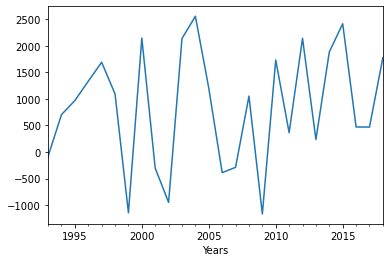

In [26]:
#Visualization of the visualization
df_diff.plot()

In [28]:
df_diff_2 = df_diff.diff(periods=2).dropna()

In [29]:
df_diff_2

Years
1995-12-31    1049.59316
1996-12-31     627.68298
1997-12-31     720.64167
1998-12-31    -237.45695
1999-12-31   -2831.24853
2000-12-31    1050.25529
2001-12-31     839.15108
2002-12-31   -3090.67793
2003-12-31    2438.64929
2004-12-31    3501.08102
2005-12-31    -933.67453
2006-12-31   -2941.46576
2007-12-31   -1489.29767
2008-12-31    1439.45470
2009-12-31    -876.33102
2010-12-31     678.84340
2011-12-31    1528.17294
2012-12-31     407.40467
2013-12-31    -128.52213
2014-12-31    -256.55355
2015-12-31    2177.63663
2016-12-31   -1410.43655
2017-12-31   -1943.44012
2018-12-31    1303.71688
Freq: A-DEC, Name: Crude_oil_production, dtype: float64

<AxesSubplot:xlabel='Years'>

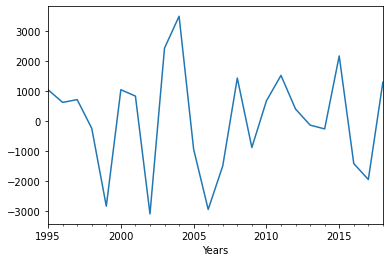

In [30]:
df_diff_2.plot()

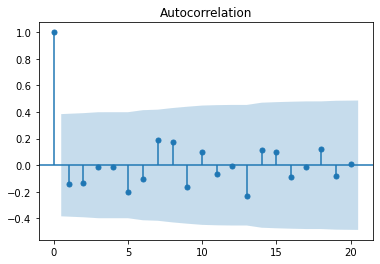

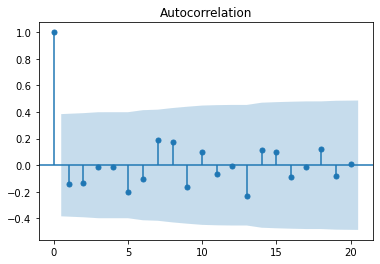

In [32]:
#ACF and PACF plots for first differencing
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_diff,lags=20)

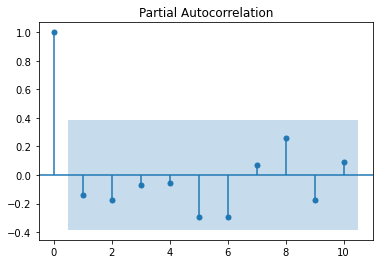

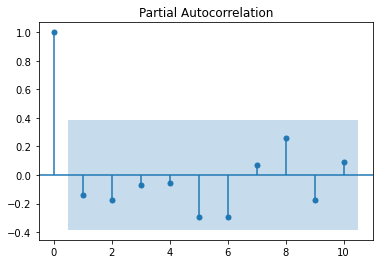

In [35]:
plot_pacf(df_diff,lags=10)

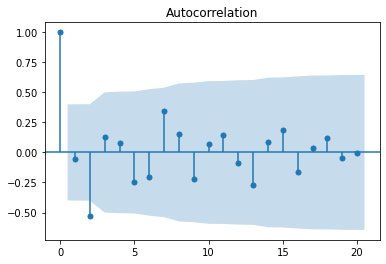

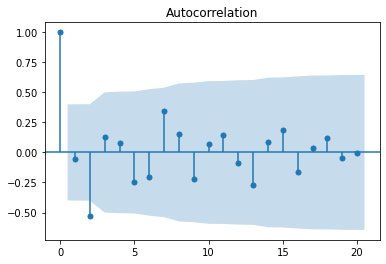

In [36]:
plot_acf(df_diff_2,lags=20)

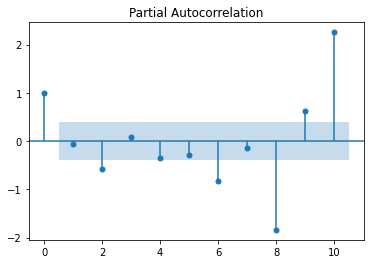

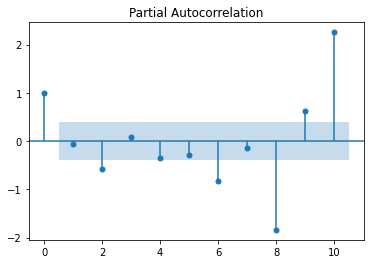

In [38]:
plot_pacf(df_diff_2,lags=10)

In [43]:
len(ts)

27

In [44]:
train = ts[:20]
test = ts[20:]

## Building the ARIMA MODEL 

In [40]:
#Declaring variables
orders1 = []   #List to order the orders from (0,8) in form of (1,0,1) etc...
rmse = []      #List to create the corresponding 
#mean_squared_error to map to the orders, usually we take the order with the least rmse for better accuracy

p=range(0,8)    #These are hyerparameters that generate the order for prediction in p,d,q from 0,8
q=range(0,8)
d=range(0,2)    #differencing range usually runs from 0,2 range

import itertools

In [42]:
pdq_com = list(itertools.product(p,d,q))
len(pdq_com)

128

In [45]:
for pdq in pdq_com:
    try:
        model = ARIMA(train,order=(pdq)).fit()
        pred = model.predict(start=len(train), end=(len(ts)-1))
        error = np.sqrt(mean_squared_error(test,pred))
        orders1.append(pdq) #appends the created pdq order eg (0,0,0)....
        rmse.append(error) #appends the mean squared errors to the hyperparameter pdq orders
    except:
        continue

In [46]:
rmse_res = pd.DataFrame(index=orders1,data=rmse,columns=['RMSE']) #

In [47]:
rmse_res.to_csv('D:/rmse_oil.csv')

In [67]:
pd.read_csv('D:/rmse_oil.csv').head()  #This is the appended list we select the order with mininum RMSE error

,Unnamed: 0,RMSE
0,"(0, 0, 0)",11777.257965
1,"(0, 0, 1)",11716.168372
2,"(0, 0, 2)",11097.550660
3,"(0, 0, 3)",11306.544160
4,"(0, 0, 4)",10483.596818


In [48]:
#Fitting and predicting the model using the lowest mean_squared error combination

#for this order the mininum was (3,0,4) followed by (7,0,0), (6,0,4) and (1,0,0) 
#these are orders i had to fit in each prediction thats why the graphs are different and others are similar
models = ARIMA(train,order=(3,0,4)).fit()

In [50]:
print(models.summary())

                               ARMA Model Results                               
Dep. Variable:     Crude_oil_production   No. Observations:                   20
Model:                       ARMA(3, 4)   Log Likelihood                -176.785
Method:                         css-mle   S.D. of innovations           1216.964
Date:                  Mon, 09 Jan 2023   AIC                            371.570
Time:                          21:56:06   BIC                            380.532
Sample:                      12-31-1992   HQIC                           373.319
                           - 12-31-2011                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       7.636e+04        nan        nan        nan         nan         nan
ar.L1.Crude_oil_production     1.4672        nan        nan        

In [51]:
pred = models.predict(start=len(train), end=(len(ts)+20))
pred

2012-12-31    68899.320647
2013-12-31    69420.106582
2014-12-31    69749.670980
2015-12-31    70720.267999
2016-12-31    71356.099946
2017-12-31    72175.205822
2018-12-31    72901.303368
2019-12-31    73680.471924
2020-12-31    74434.206219
2021-12-31    75203.417685
2022-12-31    75965.519225
2023-12-31    76731.687324
2024-12-31    77495.145458
2025-12-31    78258.663954
2026-12-31    79019.938080
2027-12-31    79779.363543
2028-12-31    80535.902615
2029-12-31    81289.282826
2030-12-31    82038.828438
2031-12-31    82784.082366
2032-12-31    83524.476067
2033-12-31    84259.505642
2034-12-31    84988.638771
2035-12-31    85711.364765
2036-12-31    86427.168515
2037-12-31    87135.544901
2038-12-31    87835.991681
2039-12-31    88528.013819
Freq: A-DEC, dtype: float64

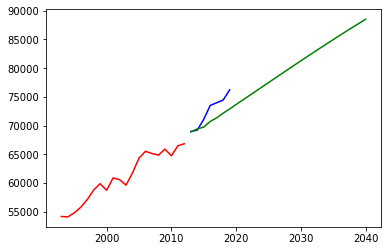

In [52]:
plt.plot(train,color='red')
plt.plot(test,color='blue')
plt.plot(pred, color='green')
plt.show()

In [54]:
#Using order (7,0,0)
models_1 = ARIMA(train,order=(7,0,0)).fit()
print(models_1.summary())

                               ARMA Model Results                               
Dep. Variable:     Crude_oil_production   No. Observations:                   20
Model:                       ARMA(7, 0)   Log Likelihood                -174.102
Method:                         css-mle   S.D. of innovations           1228.079
Date:                  Mon, 09 Jan 2023   AIC                            366.204
Time:                          21:58:42   BIC                            375.165
Sample:                      12-31-1992   HQIC                           367.953
                           - 12-31-2011                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       9.167e+04        nan        nan        nan         nan         nan
ar.L1.Crude_oil_production     1.0970      0.184      5.971      0.

In [55]:
pred_1 = models_1.predict(start=len(train), end=(len(ts)+20))
pred_1

2012-12-31    66617.112886
2013-12-31    66938.960670
2014-12-31    67232.643878
2015-12-31    67229.050052
2016-12-31    67561.496642
2017-12-31    67736.615642
2018-12-31    67786.312216
2019-12-31    67949.331154
2020-12-31    68088.720365
2021-12-31    68173.517171
2022-12-31    68302.827914
2023-12-31    68409.627271
2024-12-31    68492.083481
2025-12-31    68591.959021
2026-12-31    68685.039481
2027-12-31    68766.728122
2028-12-31    68853.867886
2029-12-31    68936.641183
2030-12-31    69014.101951
2031-12-31    69093.367567
2032-12-31    69170.578448
2033-12-31    69245.022545
2034-12-31    69319.643347
2035-12-31    69392.994426
2036-12-31    69464.879921
2037-12-31    69536.540410
2038-12-31    69607.411437
2039-12-31    69677.400012
Freq: A-DEC, dtype: float64

No handles with labels found to put in legend.


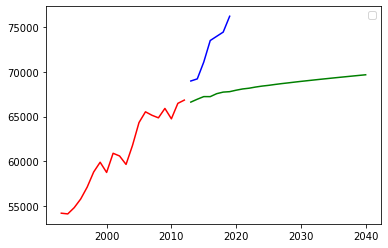

In [57]:
plt.plot(train,color='red')
plt.plot(test,color='blue')
plt.plot(pred_1, color='green')
plt.legend()
plt.show()

In [58]:
#Using order (6,0,4)
models_2 = ARIMA(train,order=(6,0,4)).fit()
print(models_2.summary())

                               ARMA Model Results                               
Dep. Variable:     Crude_oil_production   No. Observations:                   20
Model:                       ARMA(6, 4)   Log Likelihood                -169.293
Method:                         css-mle   S.D. of innovations            819.983
Date:                  Mon, 09 Jan 2023   AIC                            362.587
Time:                          22:02:49   BIC                            374.536
Sample:                      12-31-1992   HQIC                           364.920
                           - 12-31-2011                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         6.1e+04        nan        nan        nan         nan         nan
ar.L1.Crude_oil_production     2.3017        nan        nan        

In [59]:
pred_2 = models_2.predict(start=len(train), end=(len(ts)+20))
pred_2

2012-12-31    67035.874146
2013-12-31    67246.931518
2014-12-31    67458.253126
2015-12-31    67185.937266
2016-12-31    66604.102657
2017-12-31    66192.696842
2018-12-31    65690.001436
2019-12-31    64805.035665
2020-12-31    63928.532552
2021-12-31    63200.730440
2022-12-31    62235.086206
2023-12-31    61106.919217
2024-12-31    60205.227917
2025-12-31    59357.759488
2026-12-31    58323.775488
2027-12-31    57416.186603
2028-12-31    56784.676531
2029-12-31    56121.018460
2030-12-31    55452.086382
2031-12-31    55093.530848
2032-12-31    54921.621657
2033-12-31    54712.099479
2034-12-31    54686.927792
2035-12-31    54972.957114
2036-12-31    55307.507164
2037-12-31    55667.362255
2038-12-31    56290.309659
2039-12-31    57075.126726
Freq: A-DEC, dtype: float64

No handles with labels found to put in legend.


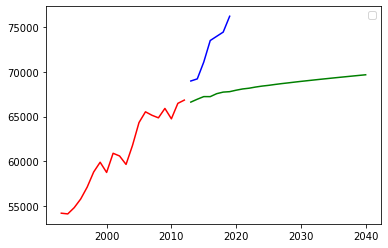

In [62]:
plt.plot(train,color='red')
plt.plot(test,color='blue')
plt.plot(pred_1, color='green')
plt.legend()
plt.show()

In [63]:
#Using order (1,0,0)
models_3 = ARIMA(train,order=(1,0,0)).fit()
print(models_3.summary())

                               ARMA Model Results                               
Dep. Variable:     Crude_oil_production   No. Observations:                   20
Model:                       ARMA(1, 0)   Log Likelihood                -173.308
Method:                         css-mle   S.D. of innovations           1303.673
Date:                  Mon, 09 Jan 2023   AIC                            352.615
Time:                          22:06:12   BIC                            355.603
Sample:                      12-31-1992   HQIC                           353.198
                           - 12-31-2011                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       6.061e+04   5057.132     11.986      0.000    5.07e+04    7.05e+04
ar.L1.Crude_oil_production     0.9732      0.035     27.972      0.

In [64]:
pred_3 = models_3.predict(start=len(train), end=(len(ts)+20))
pred_3

2012-12-31    66674.766856
2013-12-31    66512.406796
2014-12-31    66354.395865
2015-12-31    66200.617563
2016-12-31    66050.958510
2017-12-31    65905.308364
2018-12-31    65763.559740
2019-12-31    65625.608127
2020-12-31    65491.351815
2021-12-31    65360.691818
2022-12-31    65233.531802
2023-12-31    65109.778014
2024-12-31    64989.339210
2025-12-31    64872.126592
2026-12-31    64758.053742
2027-12-31    64647.036554
2028-12-31    64538.993176
2029-12-31    64433.843948
2030-12-31    64331.511347
2031-12-31    64231.919922
2032-12-31    64134.996247
2033-12-31    64040.668860
2034-12-31    63948.868214
2035-12-31    63859.526627
2036-12-31    63772.578226
2037-12-31    63687.958907
2038-12-31    63605.606281
2039-12-31    63525.459628
Freq: A-DEC, dtype: float64

No handles with labels found to put in legend.


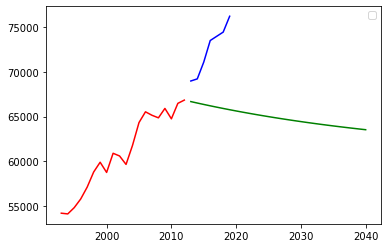

In [65]:
plt.plot(train,color='red')
plt.plot(test,color='blue')
plt.plot(pred_3, color='green')
plt.legend()
plt.show()